<a href="https://colab.research.google.com/github/AntonyLeons/Data-Mining-ACW/blob/master/Legacy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legacy Data

In [1]:
import pandas as pd
import numpy as np
import random as rand # import libs
import seaborn as sns
import sklearn
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_validate

In [2]:
# from google.colab import files  # If running on google upload data

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
# %notebook inline

In [3]:
data=pd.read_csv('data/600092_data.csv') # import CSV

In [4]:
print(data.dtypes) # see types, conta is not a int. IPSI is float but can be an int however this should not affect the model
print(f"total heading {len(data.columns)}")

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object
total heading 11


In [5]:
data.describe(include = 'all') # Data summary

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,41,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,244,1008
mean,0.509545,188365.022368,NaN,NaN,NaN,NaN,NaN,NaN,78.872032,NaN,NaN
std,0.284006,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000295,78261.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
25%,0.268531,137130.750000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN
50%,0.517616,191344.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN
75%,0.754724,244559.500000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN


In [6]:
data.head(15) # quick look at the data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
5,0.916897,169990,A-F,no,no,no,yes,no,95.0,95,Risk
6,0.383408,196122,A-F,no,yes,yes,no,no,90.0,95,Risk
7,0.538333,261057,CVA,no,no,no,no,no,75.0,60,NoRisk
8,0.678157,256128,TIA,no,no,yes,no,no,81.0,20,NoRisk
9,0.689331,196936,A-F,no,no,yes,yes,no,95.0,100,Risk


In [7]:
for headings in data.columns:
    print(f"{headings} {data[headings].nunique()}")  # get total distict for each column

Random 1222
Id 1520
Indication 5
Diabetes 2
IHD 2
Hypertension 2
Arrhythmia 2
History 2
IPSI 29
Contra 41
label 3


In [8]:
# random should be unique according to the data decription but in the id is Unique and Random has ~200 repeats, this implies the columns have been switched.
# label also has 3 values but should be nominal with Risk and NoRisk values

In [9]:
data_copy = data.copy() #copy original dataframe

In [10]:
data_copy[data_copy['Random'].duplicated()] # we can see the duplicated random records are unique

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
10,0.678157,174588,CVA,no,yes,yes,yes,no,75.0,50,Risk
15,0.025356,219417,CVA,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80.0,80,Risk
...,...,...,...,...,...,...,...,...,...,...,...
1457,0.754513,293073,A-F,no,yes,no,yes,no,95.0,100,Risk
1459,0.735681,151183,CVA,no,no,no,no,no,75.0,90,NoRisk
1467,0.889219,202550,TIA,no,no,yes,no,no,77.0,20,NoRisk
1511,0.174637,284804,TIA,no,yes,no,no,no,73.0,30,NoRisk


In [11]:
data_copy.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique

In [12]:
data.set_index('Id',inplace=True,verify_integrity=True) # setting unique index as Id is unique for reference

In [13]:
data_copy['Contra'] = pd.to_numeric(data_copy['Contra'],errors='coerce') # convert conta to numberic values replacing invalid with NaNs
data_copy.dtypes # conta now numeric 

Random          float64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra          float64
label            object
dtype: object

In [14]:
data_copy['label'].unique() #only 2 possible values

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [15]:
data_copy["label"] = data_copy['label'].replace('Unknown',np.nan)

In [16]:
data_copy['label'].unique()

array(['NoRisk', 'Risk', nan], dtype=object)

In [17]:
data_copy['Indication'].unique()  # Data Decription says only 4 possible values

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [18]:
data_copy['Indication'] = data_copy['Indication'].replace('Asx','ASX')
data_copy['Indication'] = data_copy['Indication'].replace('ASx','ASX')

In [19]:
data_copy['Indication'].unique()

array(['A-F', 'TIA', 'CVA', 'ASX', nan], dtype=object)

Indication      3
Diabetes        2
Hypertension    3
History         2
IPSI            4
Contra          1
label           5
dtype: int64
total  20
Percent 1.32%


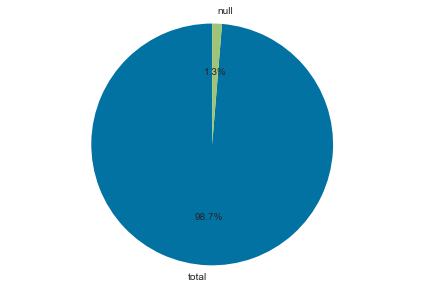

In [20]:
null_headings = data_copy.isnull().any()
null_columns = data_copy.columns[null_headings]
null_column_count = data_copy[null_columns].isnull().sum() 
# find the number of null values in each column, Note Contra is absent
total_null = null_column_count.sum()
print(null_column_count)
print(f"total  {total_null}") # total records containing null values
percent = (total_null/len(data_copy.index))*100
print(f"Percent {percent:.3}%") #  20 records cointain null, this makes up only 1.32% of the data

labels = ['total','null']
values = [len(data_copy.index),total_null]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [21]:
null_records = pd.DataFrame(columns=data_copy.columns)
for headings in null_columns:
    null_records = null_records.append(data_copy[data_copy[headings].isnull()]) #append all records with null values to dataframe
null_records

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
261060,0.648122,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
205845,0.211760,NaN,no,yes,no,no,no,80.0,100.0,Risk
256076,0.761219,NaN,no,no,no,yes,yes,99.0,100.0,Risk
224257,0.681744,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
210861,0.392130,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
240232,0.388790,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
289096,0.707950,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
158024,0.319215,TIA,no,no,NaN,no,no,75.0,75.0,NoRisk
260770,0.617072,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
196483,0.243645,CVA,no,no,yes,yes,NaN,95.0,100.0,Risk


In [22]:
# all records with null values

In [23]:
data_copy.dropna(inplace=True) # drop na and nan records

In [24]:
data_copy.describe(include = 'all') # check 20 records removed

,Random,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1500.000000,1500,1500,1500,1500,1500,1500,1500.000000,1500.000000,1500
unique,NaN,4,2,2,2,2,2,NaN,NaN,2
top,NaN,A-F,no,no,no,no,no,NaN,NaN,NoRisk
freq,NaN,489,1425,789,777,1177,1478,NaN,NaN,1000
mean,0.509543,NaN,NaN,NaN,NaN,NaN,NaN,78.828000,56.668000,NaN
std,0.284369,NaN,NaN,NaN,NaN,NaN,NaN,10.159555,29.524977,NaN
min,0.000295,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,10.000000,NaN
25%,0.267899,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,30.000000,NaN
50%,0.517616,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,50.000000,NaN
75%,0.754724,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,85.000000,NaN


In [25]:
data.loc[254469]

Random          0.518558
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 254469, dtype: object

In [26]:
class_data = data_copy.copy()
class_data = class_data.drop(columns=['Random'])
class_data

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
Id,,,,,,,,,
218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...
93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk


# Visualisation

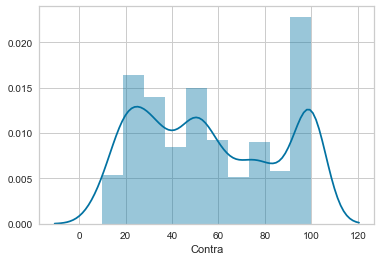

In [27]:
sns.distplot(class_data['Contra'])

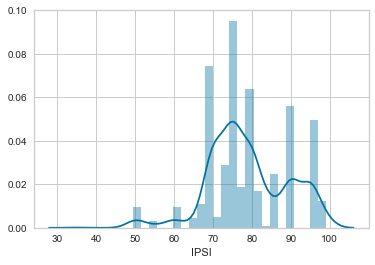

In [28]:
sns.distplot(class_data['IPSI'])

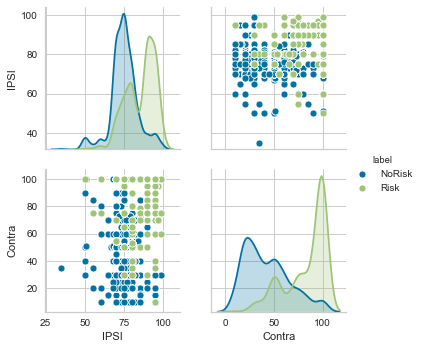

In [29]:
sns.pairplot(class_data, hue='label')

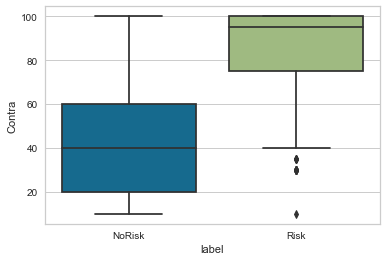

In [30]:
sns.boxplot(x='label',y='Contra',data=class_data)
plt.show()

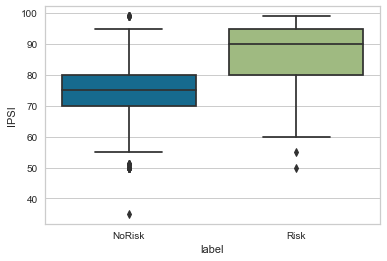

In [31]:
sns.boxplot(x='label',y='IPSI',data=class_data)
plt.show()

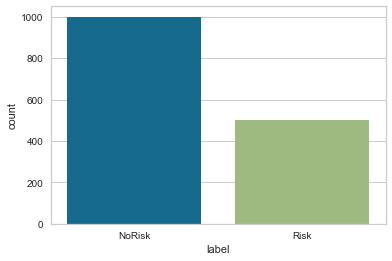

In [32]:
sns.countplot(class_data['label'],Label='count')

## Data prep

In [33]:
le = preprocessing.LabelEncoder()
class_data['label']=le.fit_transform(class_data['label'])
class_data['Diabetes']=le.fit_transform(class_data['Diabetes'])
class_data['IHD']=le.fit_transform(class_data['IHD'])
class_data['Hypertension']=le.fit_transform(class_data['Hypertension'])
class_data['Arrhythmia']=le.fit_transform(class_data['Arrhythmia'])
class_data['History']=le.fit_transform(class_data['History'])
class_data['Indication']=le.fit_transform(class_data['Indication']) # alphabetical

class_data.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
Id,,,,,,,,,
218242,0,0,0,1,0,0,78.0,20.0,0
159284,3,0,0,0,0,0,70.0,60.0,0
106066,0,0,1,1,0,0,95.0,40.0,1
229592,3,0,0,1,0,0,90.0,85.0,1
245829,2,0,0,0,0,0,70.0,20.0,0


In [34]:
split = sklearn.model_selection.train_test_split(class_data,shuffle=True)
train = split[0]
test = split[1]
all_x = class_data.drop(columns=['label']) 
all_y = class_data['label']

## Logistic Regression

In [85]:
model = LogisticRegression(solver='lbfgs')
train_x = train['Contra']
train_y = train['label']
test_x = test['Contra']
test_y = test['label']
print(train_x.shape)
print(train_y.shape)

(1125,)
(1125,)


In [86]:
train_x = np.asarray(train_x).reshape(-1,1)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x).reshape(-1,1)
test_y = np.asarray(test_y)
print(train_x.shape)
print(train_y.shape)

(1125, 1)
(1125,)


In [87]:
reg_model = model.fit(X=train_x,y=train_y)

In [84]:
pred_y = reg_model.predict(test_x)

In [39]:
reg_model.score(test_x,test_y)

0.8453333333333334

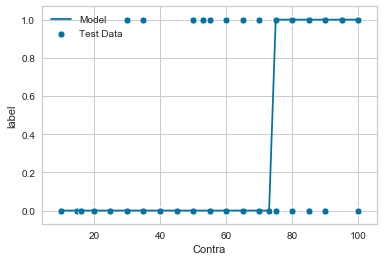

In [40]:
sns.lineplot(x=test['Contra'], y=pred_y.ravel(), label='Model')
sns.scatterplot(x=test['Contra'], y=test['label'], label='Test Data')

In [41]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       255
           1       0.77      0.73      0.75       120

    accuracy                           0.85       375
   macro avg       0.82      0.82      0.82       375
weighted avg       0.84      0.85      0.84       375



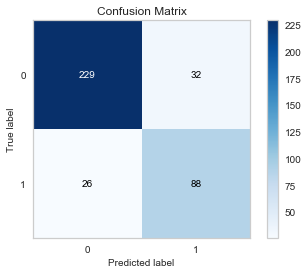

In [42]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)

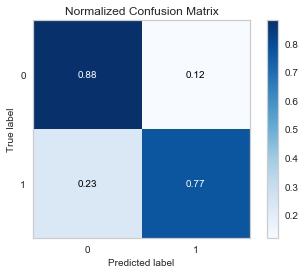

In [43]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)

In [77]:
reg_model = LogisticRegression(solver='lbfgs',max_iter=300) # 250 iterations create convergence issues
train_x = train.drop(columns=['label']) 
train_y = train['label']
test_x = test.drop(columns=['label']) # remove label from test
test_y = test['label']
print(train_x.shape)
print(train_y.shape)

(1125, 8)
(1125,)


In [78]:
reg_model = reg_model.fit(X=train_x,y=train_y)
pred_y = reg_model.predict(test_x)
reg_model.score(test_x,test_y)

0.968

In [79]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       267
           1       0.92      0.97      0.95       108

    accuracy                           0.97       375
   macro avg       0.95      0.97      0.96       375
weighted avg       0.97      0.97      0.97       375



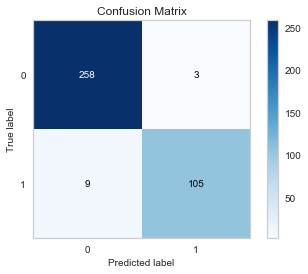

In [80]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

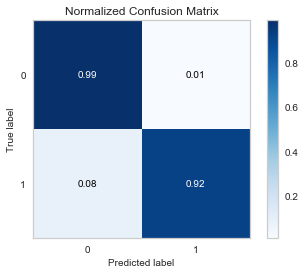

In [81]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

In [49]:
reg_model = LogisticRegression(solver='liblinear',max_iter=270) # 250 iterations create convergence issues
train_x = train.drop(columns=['label']) 
train_y = train['label']
test_x = test.drop(columns=['label']) # remove label from test
test_y = test['label']
print(train_x.shape)
print(train_y.shape)

(1125, 8)
(1125,)


In [50]:
reg_model = reg_model.fit(X=train_x,y=train_y)
pred_y = reg_model.predict(test_x)
reg_model.score(test_x,test_y)

0.9626666666666667

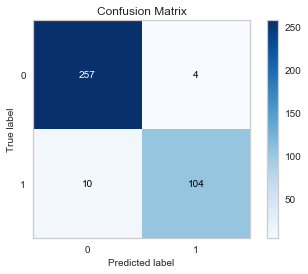

In [51]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

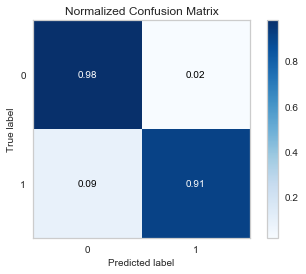

In [52]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

# Binary Tree

In [53]:
bin_tree = DecisionTreeClassifier()
bin_tree = bin_tree.fit(X=train_x, y=train_y)
pred_y = bin_tree.predict(test_x)

[Text(699.5120192307692, 1037.7818181818182, 'Arrhythmia <= 0.5\ngini = 0.451\nsamples = 1125\nvalue = [739, 386]'),
 Text(443.9855769230769, 938.9454545454546, 'Contra <= 61.0\ngini = 0.274\nsamples = 874\nvalue = [731, 143]'),
 Text(252.1730769230769, 840.1090909090909, 'IPSI <= 87.5\ngini = 0.085\nsamples = 629\nvalue = [601, 28]'),
 Text(160.96153846153845, 741.2727272727273, 'Diabetes <= 0.5\ngini = 0.041\nsamples = 568\nvalue = [556, 12]'),
 Text(107.30769230769229, 642.4363636363637, 'Indication <= 0.5\ngini = 0.035\nsamples = 563\nvalue = [553, 10]'),
 Text(64.38461538461539, 543.6, 'History <= 0.5\ngini = 0.096\nsamples = 179\nvalue = [170, 9]'),
 Text(42.92307692307692, 444.76363636363635, 'Hypertension <= 0.5\ngini = 0.086\nsamples = 178\nvalue = [170, 8]'),
 Text(21.46153846153846, 345.9272727272727, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]'),
 Text(64.38461538461539, 345.9272727272727, 'IHD <= 0.5\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(42.92307692307692,

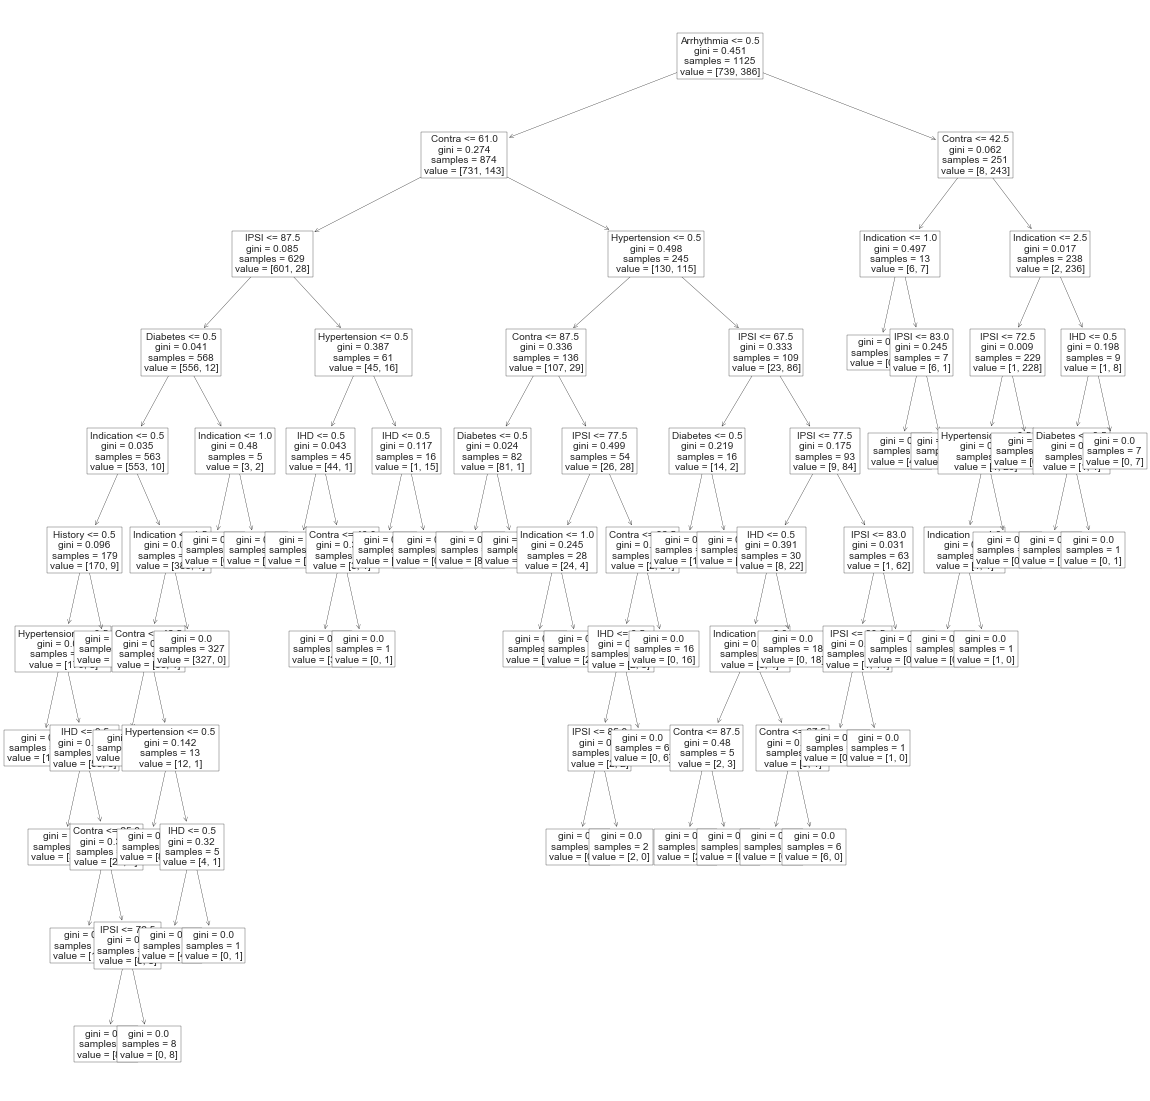

In [54]:
o_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,20)
plot_tree( bin_tree, feature_names=class_data.columns, fontsize=10)

In [55]:
plt.rcParams["figure.figsize"] = o_size
bin_tree.score(test_x,test_y)

0.9893333333333333

In [56]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       259
           1       0.99      0.97      0.98       116

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



In [57]:
cross_validate(bin_tree,all_x,y = all_y)

c:\users\anton\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.00675845, 0.00801015, 0.00318646]),
 'score_time': array([0.        , 0.00230551, 0.00405335]),
 'test_score': array([0.98203593, 0.986     , 0.98797595])}

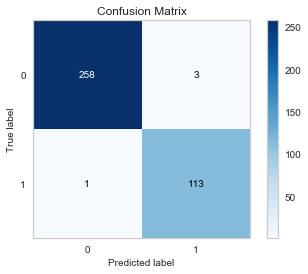

In [58]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y) 

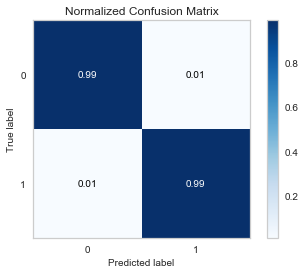

In [59]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)

# Neural-net

In [60]:
n_net = MLPClassifier(solver='adam', max_iter=50000, hidden_layer_sizes=(10), random_state=1)
n_net = n_net.fit(train_x,train_y)
pred_y = n_net.predict(test_x)
n_net.score(test_x,test_y)

0.952

In [61]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       261
           1       0.92      0.92      0.92       114

    accuracy                           0.95       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.95      0.95      0.95       375



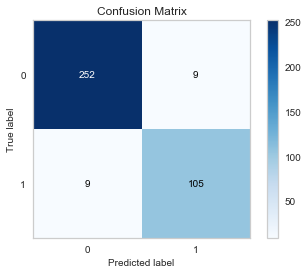

In [62]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)

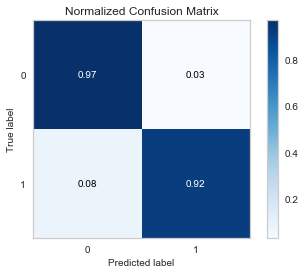

In [63]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)

# Random Forest

In [64]:
Rand_for = RandomForestClassifier(n_estimators=50)
Rand_for = Rand_for.fit(train_x,train_y)
pred_y = Rand_for.predict(test_x)
Rand_for.score(test_x,test_y)

0.9946666666666667

In [65]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       0.99      0.99      0.99       114

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



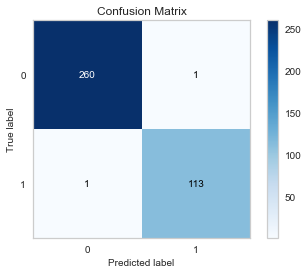

In [66]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

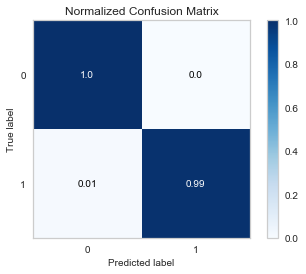

In [67]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

# Gaussian naive bates

In [68]:
gnb = GaussianNB()
gnb = gnb.fit(train_x, train_y)
pred_y = gnb.predict(test_x)
gnb.score(test_x,test_y)

0.904

In [69]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       287
           1       0.73      0.94      0.82        88

    accuracy                           0.90       375
   macro avg       0.85      0.92      0.88       375
weighted avg       0.92      0.90      0.91       375



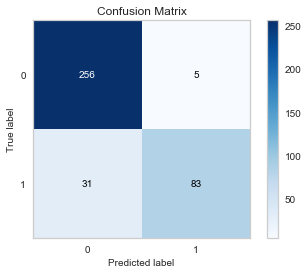

In [70]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)
plt.show()

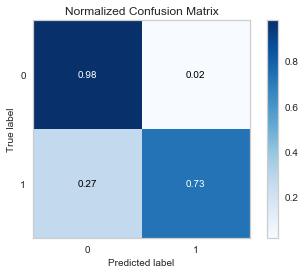

In [71]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)
plt.show()

In [72]:
from xgboost import XGBClassifier
from xgboost import plot_tree

model = XGBClassifier()
model =model.fit(train_x, train_y, eval_set=[(test_x, test_y)])
pred_y = model.predict(test_x)
model.score(test_x,test_y)

[0]	validation_0-error:0.058667
[1]	validation_0-error:0.058667
[2]	validation_0-error:0.058667
[3]	validation_0-error:0.053333
[4]	validation_0-error:0.050667
[5]	validation_0-error:0.048
[6]	validation_0-error:0.064
[7]	validation_0-error:0.050667
[8]	validation_0-error:0.045333
[9]	validation_0-error:0.061333
[10]	validation_0-error:0.045333
[11]	validation_0-error:0.037333
[12]	validation_0-error:0.037333
[13]	validation_0-error:0.04
[14]	validation_0-error:0.04
[15]	validation_0-error:0.026667
[16]	validation_0-error:0.026667
[17]	validation_0-error:0.034667
[18]	validation_0-error:0.026667
[19]	validation_0-error:0.032
[20]	validation_0-error:0.032
[21]	validation_0-error:0.032
[22]	validation_0-error:0.037333
[23]	validation_0-error:0.034667
[24]	validation_0-error:0.034667
[25]	validation_0-error:0.032
[26]	validation_0-error:0.032
[27]	validation_0-error:0.032
[28]	validation_0-error:0.032
[29]	validation_0-error:0.032
[30]	validation_0-error:0.032
[31]	validation_0-error:0.03

0.9866666666666667

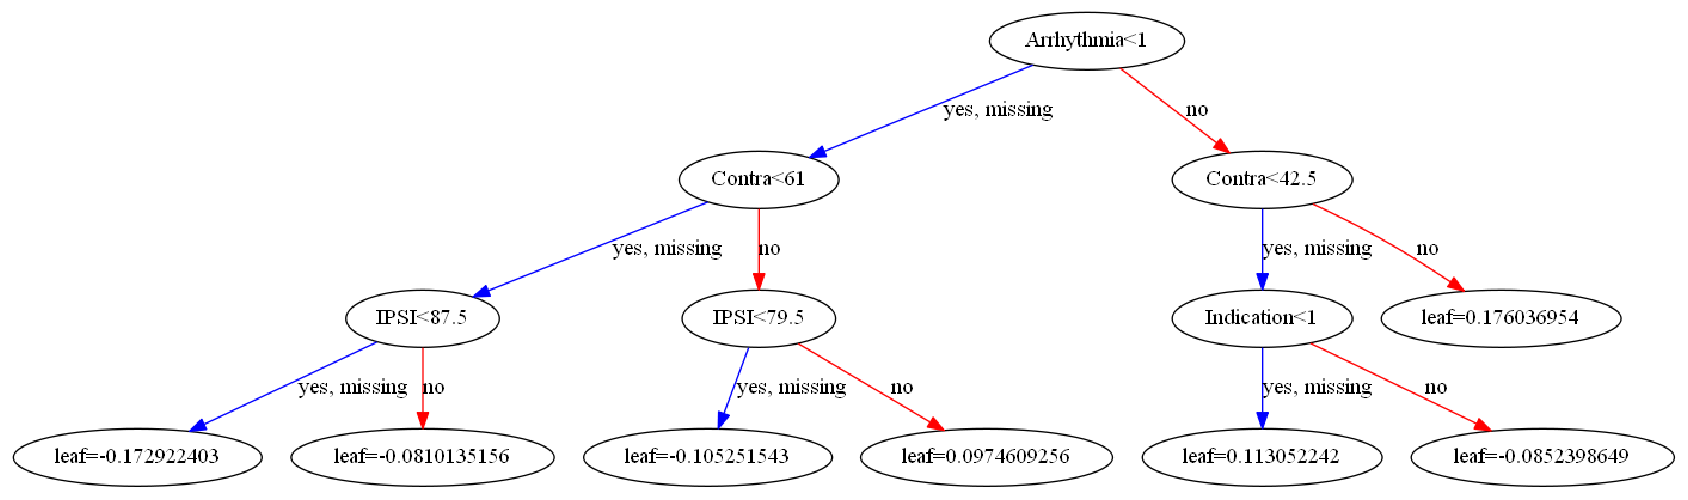

In [73]:
plot_tree(model, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(30, 15)

In [74]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       262
           1       0.97      0.98      0.98       113

    accuracy                           0.99       375
   macro avg       0.98      0.99      0.98       375
weighted avg       0.99      0.99      0.99       375



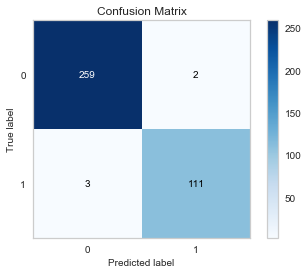

In [75]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y)

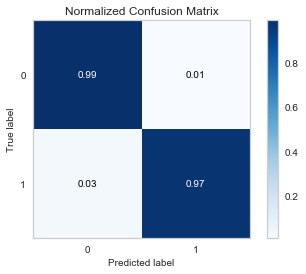

In [76]:
skplt.metrics.plot_confusion_matrix(test_y, pred_y,normalize=True)